#**Delivery Time Predictions**

# Project Background

Waktu pengiriman makanan merupakan faktor krusial dalam industri online food delivery. Pelanggan cenderung lebih puas jika pesanan mereka diantar tepat waktu dan sesuai estimasi. Perusahaan seperti Zomato perlu memahami faktor-faktor apa saja yang memengaruhi lama waktu pengantaran, agar dapat mengoptimalkan rute, alokasi pengemudi, serta kualitas layanan secara keseluruhan. Dataset ini berisi informasi mengenai karakteristik pengemudi, restoran, lokasi pengantaran, kondisi lalu lintas, cuaca, jenis kendaraan, hingga jenis pesanan. Dengan menganalisis data ini, perusahaan dapat membangun model prediksi waktu pengantaran yang lebih akurat, sehingga mampu meningkatkan efisiensi operasional sekaligus kepuasan pelanggan.

# Objective

* Melakukan Exploratory Data Analysis (EDA) untuk memahami distribusi data dan pola yang memengaruhi waktu pengantaran.

* Membangun model prediksi estimasi waktu pengantaran (delivery time prediction).

* Membandingkan performa beberapa model regresi dengan metrik evaluasi (MAE, RMSE, R²).

* Mengidentifikasi feature importance untuk mengetahui faktor-faktor yang paling berpengaruh terhadap waktu pengantaran.

* Memberikan insight bisnis dan rekomendasi strategis bagi perusahaan untuk meningkatkan efisiensi operasi dan pengalaman pelanggan.

# Columns Descriptions

| Column Name                | Description                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| ID                          | Unique identifier for each delivery.                                        |
| Delivery_person_ID          | Unique identifier for each delivery person.                                 |
| Delivery_person_Age         | Age of the delivery person.                                                 |
| Delivery_person_Ratings     | Ratings assigned to the delivery person.                                    |
| Restaurant_latitude         | Latitude of the restaurant.                                                 |
| Restaurant_longitude        | Longitude of the restaurant.                                                |
| Delivery_location_latitude  | Latitude of the delivery location.                                          |
| Delivery_location_longitude | Longitude of the delivery location.                                         |
| Order_Date                  | Date of the order.                                                          |
| Time_Ordered                | Time the order was placed.                                                  |
| Time_Order_picked           | Time the order was picked up for delivery.                                  |
| Weather_conditions          | Weather conditions at the time of delivery.                                 |
| Road_traffic_density        | Density of road traffic during delivery.                                    |
| Vehicle_condition           | Condition of the delivery vehicle.                                          |
| Type_of_order               | Type of order (e.g., dine-in, takeaway, delivery).                          |
| Type_of_vehicle             | Type of vehicle used for delivery.                                          |
| Multiple_deliveries         | Indicator of whether multiple deliveries were made in the same trip.        |
| Festival                    | Indicator of whether the delivery coincided with a festival.                |
| City                        | City where the delivery took place.                                         |
| Time_taken (min)            | Time taken for delivery in minutes (target variable).                       |


# Import Library

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
  LabelEncoder,
  StandardScaler,
  OneHotEncoder,
  OrdinalEncoder,
)

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

import shap

# Load Dataset

In [ ]:
# Read Dataset Zomato
df = pd.read_csv('Zomato Dataset.csv')

In [ ]:
# Cek jumlah kolom dan baris
df.shape

(45584, 20)

In [ ]:
# Tampilkan sampel data
df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
16582,0xe2b,MYSRES04DEL02,26.0,4.9,12.308500,76.665808,12.438500,76.795808,29-03-2022,20:20,20:35,Fog,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,37
33861,0x88df,JAPRES12DEL01,23.0,4.9,26.902908,75.792934,26.972908,75.862934,14-03-2022,17:40,17:50,Stormy,Medium,2,Buffet,motorcycle,0.0,No,Metropolitian,26
27960,0x23ac,PUNERES08DEL01,23.0,4.6,18.534080,73.898520,18.604080,73.968520,08-03-2022,23:15,23:20,Stormy,Low,0,Drinks,motorcycle,0.0,No,Urban,15
33539,0xb84e,MUMRES08DEL02,29.0,4.6,19.065838,72.832658,19.195838,72.962658,25-03-2022,19:30,19:40,Stormy,Jam,2,Drinks,electric_scooter,1.0,No,Urban,28
44879,0x1fb6,BANGRES15DEL03,28.0,4.6,12.975377,77.696664,13.035377,77.756664,30-03-2022,17:55,0.75,Cloudy,Medium,2,Meal,scooter,1.0,NaN,Metropolitian,13


In [ ]:
# Cek tipe data yang dianalisis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

# Data Cleansing

## Check Duplicated

In [ ]:
# Cek Data Duplikat
df.duplicated().sum()

np.int64(0)

## Split Dataset

In [ ]:
# Menentukan kolom target
target_column = 'Time_taken (min)'

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=target_column),
    df[target_column],
    test_size=0.2,
    random_state=11,
    stratify=df[target_column],
)

In [ ]:
# cek jumlah dataset train
x_train.shape

(36467, 19)

In [ ]:
# Cek jumlah dataset test
x_test.shape

(9117, 19)

## Check Missing Value

In [ ]:
# Cek Missing Value
x_train.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1474
Delivery_person_Ratings,1521
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1376


In [ ]:
# Menampilkan kolom dalam data train
x_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City'],
      dtype='object')

In [ ]:
# Menampilkan kategori data di setiap kolom
for column in x_train.columns:
    print(f'========= {column} ========')
    display(x_train[column].value_counts())
    print('\n')

========= ID ========


,count
ID,
0x3392,1
0x701,1
0x1056,1
0x260a,1
0x37f7,1
...,...
0x79a2,1
0x53c6,1
0xdf74,1




========= Delivery_person_ID ========


,count
Delivery_person_ID,
SURRES11DEL01,60
VADRES11DEL02,58
VADRES08DEL02,58
JAPRES06DEL03,56
SURRES01DEL02,56
...,...
AURGRES05DEL03,5
KOLRES12DEL02,4
KOLRES08DEL03,4




========= Delivery_person_Age ========


,count
Delivery_person_Age,
38.0,1794
35.0,1788
30.0,1780
33.0,1774
29.0,1773
25.0,1772
36.0,1772
24.0,1770
22.0,1763




========= Delivery_person_Ratings ========


,count
Delivery_person_Ratings,
4.8,5732
4.7,5720
4.9,5615
4.6,5594
5.0,3177
4.5,2614
4.1,1167
4.2,1128
4.3,1112




========= Restaurant_latitude ========


,count
Restaurant_latitude,
0.000000,2927
26.892312,154
26.911378,148
26.913726,146
26.902328,146
...,...
-18.569156,1
-19.878028,1
-19.888716,1




========= Restaurant_longitude ========


,count
Restaurant_longitude,
0.000000,2927
75.806896,154
75.789034,148
75.752820,147
75.794257,146
...,...
-88.322337,1
-77.683237,1
-76.625861,1




========= Delivery_location_latitude ========


,count
Delivery_location_latitude,
0.040000,277
0.090000,274
0.020000,273
0.110000,272
0.130000,271
...,...
22.535082,1
27.227772,1
20.005337,1




========= Delivery_location_longitude ========


,count
Delivery_location_longitude,
0.040000,277
0.090000,274
0.020000,273
0.110000,272
0.130000,271
...,...
88.387830,1
78.117250,1
75.446722,1




========= Order_Date ========


,count
Order_Date,
15-03-2022,978
13-03-2022,957
03-04-2022,943
19-03-2022,938
01-04-2022,936
03-03-2022,926
05-03-2022,922
09-03-2022,920
05-04-2022,919




========= Time_Orderd ========


,count
Time_Orderd,
21:55,377
22:20,368
19:50,366
0.833333333,365
17:55,365
...,...
16:15,45
14:30,45
0.666666667,40




========= Time_Order_picked ========


,count
Time_Order_picked,
21:30,386
20:50,381
21:45,377
17:55,374
18:40,373
...,...
12:20,38
16:15,36
17:10,33




========= Weather_conditions ========


,count
Weather_conditions,
Fog,6196
Stormy,6050
Cloudy,5999
Sandstorms,5979
Windy,5942
Sunny,5819




========= Road_traffic_density ========


,count
Road_traffic_density,
Low,12364
Jam,11287
Medium,8772
High,3573




========= Vehicle_condition ========


,count
Vehicle_condition,
0,12072
1,12019
2,11966
3,410




========= Type_of_order ========


,count
Type_of_order,
Snack,9292
Meal,9185
Buffet,8995
Drinks,8995




========= Type_of_vehicle ========


,count
Type_of_vehicle,
motorcycle,21228
scooter,12150
electric_scooter,3035
bicycle,54




========= multiple_deliveries ========


,count
multiple_deliveries,
1.0,22523
0.0,11315
2.0,1571
3.0,286




========= Festival ========


,count
Festival,
No,35555
Yes,731




========= City ========


,count
City,
Metropolitian,27240
Urban,8126
Semi-Urban,140


In [ ]:
for val in x_train['Time_Orderd'].unique():
    print(val)


nan
19:40
17:40
11:40
17:10
0.375
17:20
11:35
23:35
0.458333333
21:35
19:10
21:45
22:55
10:20
18:45
21:55
20:10
15:30
08:15
22:25
16:15
09:30
20:35
09:35
18:30
20:50
17:15
20:30
20:15
21:40
17:35
18:10
18:55
23:30
23:55
0.708333333
0.75
17:50
15:25
08:20
0.916666667
23:20
21:50
1
18:20
17:25
23:40
10:45
0.5
08:55
20:20
20:55
0.875
0.958333333
09:55
19:50
18:50
22:35
09:20
10:35
09:15
22:50
10:40
21:30
17:45
19:55
12:30
15:35
21:10
20:25
22:10
19:20
23:45
11:55
08:35
10:55
09:40
22:20
15:40
20:45
23:25
20:40
0.791666667
0.583333333
11:50
08:30
0.833333333
08:45
18:40
10:10
21:20
18:15
11:30
19:45
13:15
18:35
19:25
09:10
22:40
15:10
22:30
11:45
23:15
16:45
12:10
12:55
14:55
11:20
19:35
10:25
11:15
10:30
16:30
12:40
0.416666667
14:15
11:10
17:55
22:15
21:15
13:35
23:50
14:40
23:10
16:50
17:30
12:45
22:45
11:25
08:50
10:50
12:35
19:30
14:45
21:25
09:50
14:20
14:50
13:40
13:50
08:10
16:20
16:40
18:25
09:45
15:55
15:20
19:15
0.625
12:25
08:25
14:10
16:10
09:25
13:10
08:40
12:50
13:20
16:35
0

In [ ]:
# Backup kolom Time_Orderd
x_train['Time_Orderd_raw'] = x_train['Time_Orderd']
x_test['Time_Orderd_raw']  = x_test['Time_Orderd']

# Backup kolom Time_Order_picked
x_train['Time_Order_picked_raw'] = x_train['Time_Order_picked']
x_test['Time_Order_picked_raw']  = x_test['Time_Order_picked']

In [ ]:
def convert_time(x):
    try:
        if pd.isna(x):
            return None

        # Kalau string jam dengan titik dua
        if isinstance(x, str) and ":" in x:
            if x.startswith("24:"):  # ubah 24:xx jadi 00:xx
                return "00:" + x.split(":")[1]
            return x[:5]  # ambil HH:MM saja

        # Kalau string/angka desimal atau integer
        if isinstance(x, (int, float)) or (isinstance(x, str) and x.replace('.', '', 1).isdigit()):
            val = float(x)

            # Aturan khusus: kalau val == 1 → 00:00 (tengah malam)
            if val == 1:
                return "00:00"

            minutes = int(round(val * 24 * 60))
            hours, minutes = divmod(minutes, 60)
            return f"{hours:02d}:{minutes:02d}"

        return None
    except:
        return None


In [ ]:
# Cleaning langsung pada kolom utama
x_train['Time_Orderd'] = x_train['Time_Orderd'].apply(convert_time)
x_test['Time_Orderd']  = x_test['Time_Orderd'].apply(convert_time)

# Terapkan ke kolom Time_Order_picked
x_train['Time_Order_picked'] = x_train['Time_Order_picked'].apply(convert_time)
x_test['Time_Order_picked']  = x_test['Time_Order_picked'].apply(convert_time)

In [ ]:
# Parsing ke datetime
x_train['Time_Orderd'] = pd.to_datetime(x_train['Time_Orderd'], format='%H:%M', errors='coerce')
x_test['Time_Orderd']  = pd.to_datetime(x_test['Time_Orderd'], format='%H:%M', errors='coerce')

x_train['Time_Order_picked'] = pd.to_datetime(x_train['Time_Order_picked'], format='%H:%M', errors='coerce')
x_test['Time_Order_picked']  = pd.to_datetime(x_test['Time_Order_picked'], format='%H:%M', errors='coerce')

In [ ]:
# Koreksi lewat tengah malam
for df in [x_train, x_test]:
    mask = df['Time_Order_picked'] < df['Time_Orderd']
    df.loc[mask, 'Time_Order_picked'] += pd.Timedelta(days=1)

# Hitung pickup_delay
for df in [x_train, x_test]:
    df['pickup_delay'] = (
        df['Time_Order_picked'] - df['Time_Orderd']
    ).dt.total_seconds() / 60

In [ ]:
# Median per City + Traffic dari train
median_delay_ct = (
    x_train.groupby(['City','Road_traffic_density'])['pickup_delay']
    .median()
    .reset_index()
    .rename(columns={'pickup_delay':'median_delay'})
)

# Median global dari train
global_median = x_train['pickup_delay'].median()

In [ ]:
# Fungsi imputasi dengan fallback
def impute_time_orderd(row, median_ct, global_median):
    if pd.isna(row['Time_Orderd']):
        # cari kombinasi City + Traffic
        match = median_ct[
            (median_ct['City'] == row['City']) &
            (median_ct['Road_traffic_density'] == row['Road_traffic_density'])
        ]
        if not match.empty:
            delay = match['median_delay'].values[0]
        else:
            delay = global_median
        return row['Time_Order_picked'] - pd.to_timedelta(delay, unit='m')
    else:
        return row['Time_Orderd']

In [ ]:
# Menerapkan ke train & test (langsung overwrite)
x_train['Time_Orderd'] = x_train.apply(
    impute_time_orderd, axis=1, args=(median_delay_ct, global_median)
)

x_test['Time_Orderd'] = x_test.apply(
    impute_time_orderd, axis=1, args=(median_delay_ct, global_median)
)

In [ ]:
x_train.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,1474
Delivery_person_Ratings,1521
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0


In [ ]:
# Ambil semua baris yang hasil convert_time = None
invalid_picked = x_train[x_train['Time_Order_picked'].isna()]['Time_Order_picked_raw'].unique()
print(invalid_picked[:50])  # tampilkan 50 nilai unik pertama


[]


In [ ]:
x_train.drop(columns=['Time_Orderd_raw','Time_Order_picked_raw'], inplace=True)
x_test.drop(columns=['Time_Orderd_raw','Time_Order_picked_raw'], inplace=True)

In [ ]:
# Imputasi Numerik
# median dihitung dari TRAIN
age_median = x_train['Delivery_person_Age'].median()
rating_median = x_train['Delivery_person_Ratings'].median()

x_train['Delivery_person_Age'].fillna(age_median, inplace=True)
x_test['Delivery_person_Age'].fillna(age_median, inplace=True)

x_train['Delivery_person_Ratings'].fillna(rating_median, inplace=True)
x_test['Delivery_person_Ratings'].fillna(rating_median, inplace=True)

# multiple_deliveries → 0 (logis kalau kosong artinya tidak ada multiple deliveries)
x_train['multiple_deliveries'].fillna(0, inplace=True)
x_test['multiple_deliveries'].fillna(0, inplace=True)

# Imputasi Kategorikal
# kategori baru agar lebih informatif
x_train['Weather_conditions'].fillna('Unknown', inplace=True)
x_test['Weather_conditions'].fillna('Unknown', inplace=True)

x_train['Road_traffic_density'].fillna('Unknown', inplace=True)
x_test['Road_traffic_density'].fillna('Unknown', inplace=True)

x_train['Festival'].fillna('No', inplace=True)
x_test['Festival'].fillna('No', inplace=True)

x_train['City'].fillna('Unknown City', inplace=True)
x_test['City'].fillna('Unknown City', inplace=True)

# Validasi
print("Missing values TRAIN:\n", x_train.isna().sum())
print("Missing values TEST:\n", x_test.isna().sum())


Missing values TRAIN:
 ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
pickup_delay                   1376
dtype: int64
Missing values TEST:
 ID                               0
Delivery_person_ID               0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_loc

## Outliers

In [ ]:
numeric_features = [
    'Delivery_person_Age',
    'Delivery_person_Ratings',
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude',
    'multiple_deliveries',
    'Vehicle_condition',
    'pickup_delay',
]
# Combine the selected numerical columns from x_train with y_train
combined_df = x_train[numeric_features].copy()
combined_df['Time_taken (min)'] = y_train

display(combined_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,36467.0,29.574053,5.695535,15.000000,25.000000,30.000000,34.000000,50.000000
Delivery_person_Ratings,36467.0,4.636650,0.325993,1.000000,4.600000,4.700000,4.800000,6.000000
Restaurant_latitude,36467.0,17.009606,8.173827,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,36467.0,70.181318,22.913659,-88.366217,73.170000,75.897429,78.044095,88.433452
Delivery_location_latitude,36467.0,17.449943,7.339993,0.010000,12.988453,18.633481,22.783659,31.054057
Delivery_location_longitude,36467.0,70.793271,21.160915,0.010000,73.275012,75.996699,78.100221,88.563452
multiple_deliveries,36467.0,0.727315,0.575807,0.000000,0.000000,1.000000,1.000000,3.000000
Vehicle_condition,36467.0,1.019579,0.838916,0.000000,0.000000,1.000000,2.000000,3.000000
pickup_delay,35091.0,9.987889,4.081039,5.000000,5.000000,10.000000,15.000000,15.000000
Time_taken (min),36467.0,26.293718,9.384863,10.000000,19.000000,26.000000,32.000000,54.000000


In [ ]:
# Clip rating di train & test agar max 5
x_train['Delivery_person_Ratings'] = x_train['Delivery_person_Ratings'].clip(upper=5)
x_test['Delivery_person_Ratings']  = x_test['Delivery_person_Ratings'].clip(upper=5)


In [ ]:
# Gabungkan kembali X dan y
train_df = x_train.copy()
train_df["Time_taken (min)"] = y_train

# Filter outlier
outliers = train_df[train_df["Time_taken (min)"] > 50]

# Tampilkan beberapa contoh
display(outliers)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,pickup_delay,Time_taken (min)
36026,0x5c6f,INDORES12DEL01,39.0,4.7,22.748060,75.893400,22.858060,76.003400,06-04-2022,1900-01-01 19:50:00,...,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,5.0,52
39640,0x8799,PUNERES08DEL02,31.0,4.9,18.534080,73.898520,18.614080,73.978520,06-03-2022,1900-01-01 21:35:00,...,Fog,Jam,0,Meal,motorcycle,1.0,No,Metropolitian,10.0,54
18084,0xba66,COIMBRES19DEL02,32.0,5.0,11.022298,76.998349,11.152298,77.128349,06-03-2022,1900-01-01 19:55:00,...,Stormy,Jam,0,Buffet,motorcycle,1.0,Yes,Metropolitian,10.0,54
8860,0x735e,RANCHIRES15DEL01,30.0,4.6,23.369746,85.339820,23.479746,85.449820,20-03-2022,1900-01-01 21:25:00,...,Stormy,Jam,0,Buffet,motorcycle,3.0,Yes,Metropolitian,10.0,54
7035,0xdc78,LUDHRES05DEL01,30.0,4.2,30.905562,75.832841,30.975562,75.902841,14-02-2022,1900-01-01 19:35:00,...,Stormy,Jam,0,Drinks,motorcycle,1.0,Yes,Semi-Urban,5.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28051,0x3c45,COIMBRES04DEL02,31.0,4.5,11.024839,77.007003,11.104839,77.087003,25-03-2022,1900-01-01 19:55:00,...,Fog,Jam,0,Drinks,motorcycle,0.0,No,Metropolitian,10.0,52
38929,0x27dc,RANCHIRES02DEL01,35.0,4.3,0.000000,0.000000,0.070000,0.070000,31-03-2022,1900-01-01 21:30:00,...,Windy,Jam,0,Buffet,motorcycle,1.0,Yes,Urban,15.0,53
5638,0x1479,PUNERES11DEL02,33.0,4.5,18.533811,73.899315,18.663811,74.029315,31-03-2022,1900-01-01 19:35:00,...,Cloudy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,5.0,53
27287,0x59b6,JAPRES07DEL02,34.0,5.0,26.766536,75.837333,26.896536,75.967333,14-03-2022,1900-01-01 20:25:00,...,Fog,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,15.0,51


In [ ]:
# Filter outlier
outliers = train_df[train_df["Time_taken (min)"] > 50]

# Distribusi traffic
print("Distribusi Traffic pada Outlier (>50 menit):")
print(outliers["Road_traffic_density"].value_counts())

# Distribusi cuaca
print("\nDistribusi Cuaca pada Outlier (>50 menit):")
print(outliers["Weather_conditions"].value_counts())

# Distribusi multiple deliveries
print("\nDistribusi Multiple Deliveries pada Outlier (>50 menit):")
print(outliers["multiple_deliveries"].value_counts())

# Distribusi pickup delay
print("\nDistribusi Pickup Delay pada Outlier (>50 menit):")
print(outliers["pickup_delay"].value_counts())


Distribusi Traffic pada Outlier (>50 menit):
Road_traffic_density
Jam        266
High        22
Unknown      3
Name: count, dtype: int64

Distribusi Cuaca pada Outlier (>50 menit):
Weather_conditions
Fog           62
Cloudy        58
Sunny         47
Stormy        45
Windy         42
Sandstorms    34
Unknown        3
Name: count, dtype: int64

Distribusi Multiple Deliveries pada Outlier (>50 menit):
multiple_deliveries
1.0    133
3.0     74
2.0     49
0.0     35
Name: count, dtype: int64

Distribusi Pickup Delay pada Outlier (>50 menit):
pickup_delay
5.0     95
15.0    94
10.0    89
Name: count, dtype: int64


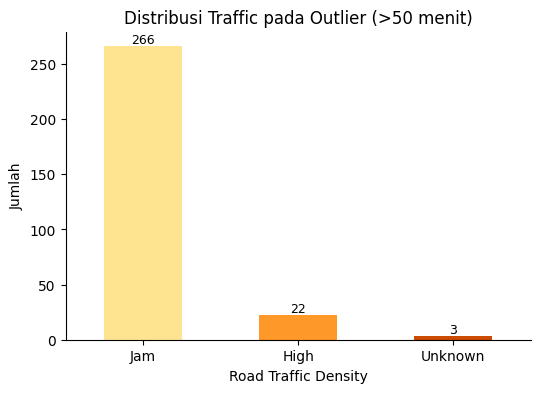

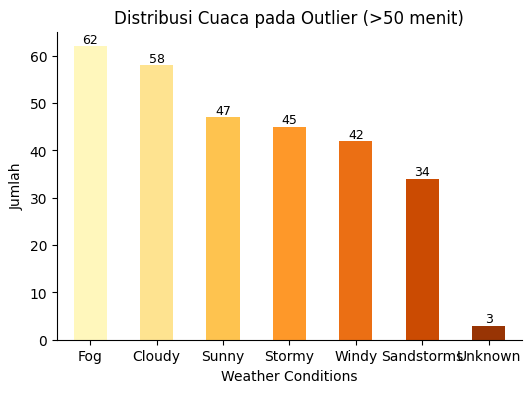

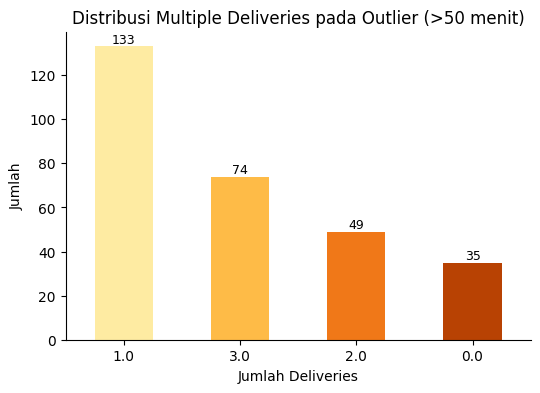

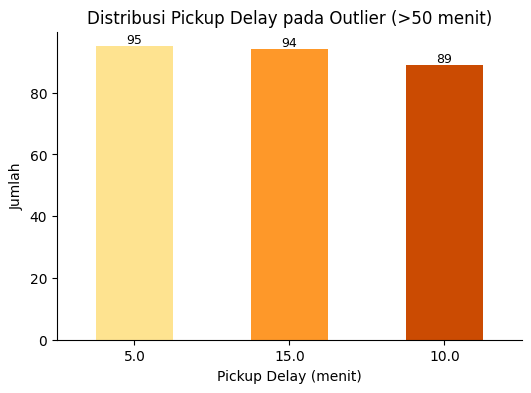

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar(series, title, xlabel):
    # Hitung distribusi
    counts = series.value_counts()

    # Buat palet warna sesuai jumlah kategori
    n_cat = counts.shape[0]
    colors = sns.color_palette("YlOrBr", n_cat)

    # Plot bar
    ax = counts.plot(kind="bar", color=colors, figsize=(6,4))

    # Judul dan label
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Jumlah")

    # Hilangkan border atas & kanan
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Hilangkan grid
    plt.grid(False)

    # Tambahkan label angka di atas bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()),
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=9)

    # Rotasi label x jadi horizontal
    plt.xticks(rotation=0)

    plt.show()

# === Traffic Density ===
plot_bar(outliers["Road_traffic_density"],
         "Distribusi Traffic pada Outlier (>50 menit)",
         "Road Traffic Density")

# === Weather Conditions ===
plot_bar(outliers["Weather_conditions"],
         "Distribusi Cuaca pada Outlier (>50 menit)",
         "Weather Conditions")

# === Multiple Deliveries ===
plot_bar(outliers["multiple_deliveries"],
         "Distribusi Multiple Deliveries pada Outlier (>50 menit)",
         "Jumlah Deliveries")

# === Pickup Delay ===
plot_bar(outliers["pickup_delay"],
         "Distribusi Pickup Delay pada Outlier (>50 menit)",
         "Pickup Delay (menit)")


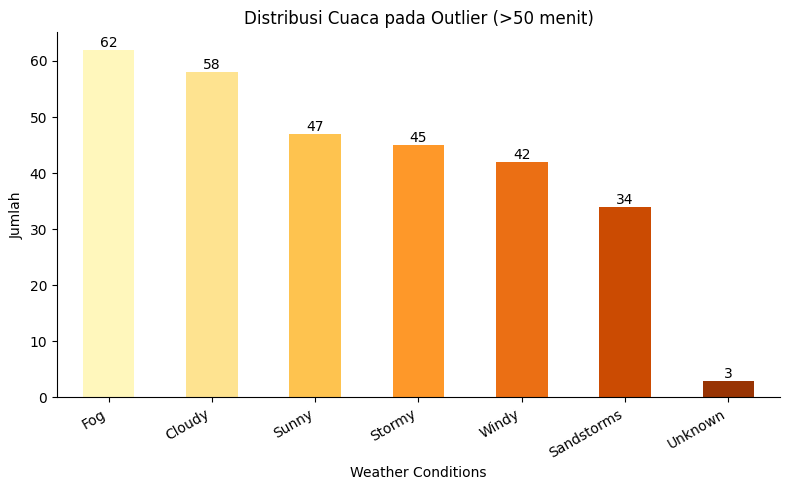

In [ ]:
counts = outliers["Weather_conditions"].value_counts()
n_cat = counts.shape[0]
colors = sns.color_palette("YlOrBr", n_cat)

plt.figure(figsize=(8,5))  # figure lebih lebar
ax = counts.plot(kind="bar", color=colors)

plt.title("Distribusi Cuaca pada Outlier (>50 menit)")
plt.xlabel("Weather Conditions")
plt.ylabel("Jumlah")

# Hilangkan border atas & kanan
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tambahkan angka di atas bar
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Rotasi label x supaya tidak berhimpit
plt.xticks(rotation=30, ha="right")

plt.tight_layout()
plt.grid(False)
plt.show()


In [ ]:
print(x_train["Type_of_vehicle"].value_counts(normalize=True))

Type_of_vehicle
motorcycle          0.582115
scooter             0.333178
electric_scooter    0.083226
bicycle             0.001481
Name: proportion, dtype: float64


In [ ]:
train_df.groupby("Type_of_vehicle")["Time_taken (min)"].mean()

,Time_taken (min)
Type_of_vehicle,
bicycle,26.037037
electric_scooter,24.476112
motorcycle,27.593933
scooter,24.477202


In [ ]:
# Ganti nilai tidak realistis jadi NaN (train + test)
for col in ["Restaurant_latitude", "Restaurant_longitude",
            "Delivery_location_latitude", "Delivery_location_longitude"]:

    if "latitude" in col:
        # latitude wajar untuk India: 8–37, buang juga yang <1
        x_train[col] = x_train[col].mask((x_train[col] < 8) | (x_train[col] > 37) | (x_train[col] < 1))
        x_test[col]  = x_test[col].mask((x_test[col] < 8) | (x_test[col] > 37) | (x_test[col] < 1))
    else:
        # longitude wajar untuk India: 68–97, buang juga yang <1
        x_train[col] = x_train[col].mask((x_train[col] < 68) | (x_train[col] > 97) | (x_train[col] < 1))
        x_test[col]  = x_test[col].mask((x_test[col] < 68) | (x_test[col] > 97) | (x_test[col] < 1))

# Cek jumlah NaN setelah masking
print("NaN di train:")
print(x_train.isna().sum())
print("\nNaN di test:")
print(x_test.isna().sum())

# Hitung median per City dari TRAIN
median_per_city = x_train.groupby("City")[[
    "Restaurant_latitude","Restaurant_longitude",
    "Delivery_location_latitude","Delivery_location_longitude"
]].median()

# Function untuk imputasi berdasarkan City
def fill_with_city_median(df):
    for col in median_per_city.columns:
        df[col] = df.apply(
            lambda row: median_per_city.loc[row["City"], col] if pd.isna(row[col]) else row[col],
            axis=1
        )
    return df

# Imputasi train dan test
x_train = fill_with_city_median(x_train)
x_test = fill_with_city_median(x_test)


NaN di train:
ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude            3265
Restaurant_longitude           3056
Delivery_location_latitude     2927
Delivery_location_longitude    2927
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
pickup_delay                   1376
dtype: int64

NaN di test:
ID                               0
Delivery_person_ID               0
Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude            806
Restaurant_longitude           746
Delivery_location_latitude   

## Feature Creation

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius bumi dalam km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


In [ ]:
# Hitung jarak pada train
x_train["distance_km"] = haversine(
    x_train["Restaurant_latitude"], x_train["Restaurant_longitude"],
    x_train["Delivery_location_latitude"], x_train["Delivery_location_longitude"]
)

# Hitung jarak pada test
x_test["distance_km"] = haversine(
    x_test["Restaurant_latitude"], x_test["Restaurant_longitude"],
    x_test["Delivery_location_latitude"], x_test["Delivery_location_longitude"]
)


In [ ]:
print(x_train["distance_km"].describe())
print(x_test["distance_km"].describe())


count    36467.000000
mean        15.366916
std         68.238633
min          1.465067
25%          5.958832
50%          9.055525
75%         13.583460
max       1372.124948
Name: distance_km, dtype: float64
count    9117.000000
mean       15.682189
std        70.005329
min         1.465159
25%         5.957766
50%         9.054602
75%        13.481647
max      1323.044813
Name: distance_km, dtype: float64


In [ ]:
# Jarak terlalu kecil
invalid_small = x_train[x_train["distance_km"] < 0.5]
print("Jumlah jarak terlalu kecil:", len(invalid_small))
display(invalid_small.head())

# Jarak terlalu besar
invalid_large = x_train[x_train["distance_km"] > 50]
print("Jumlah jarak terlalu besar:", len(invalid_large))
display(invalid_large.head())

# Kalau mau gabungan
invalid_distance = x_train[(x_train["distance_km"] < 0.5) | (x_train["distance_km"] > 50)]
print("Total jarak tidak valid:", len(invalid_distance))


Jumlah jarak terlalu kecil: 0


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,pickup_delay,distance_km


Jumlah jarak terlalu besar: 325


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,pickup_delay,distance_km
13761,0x54d,SURRES02DEL03,30.0,4.7,19.065838,72.794136,21.246608,72.854136,01-03-2022,1900-01-01 22:00:00,...,Fog,Jam,1,Snack,scooter,1.0,No,Urban,NaN,242.571415
32888,0xc0f8,AURGRES08DEL02,22.0,5.0,19.055831,75.364792,20.006428,75.494792,18-02-2022,1900-01-01 21:45:00,...,Windy,Jam,0,Drinks,motorcycle,0.0,No,Metropolitian,5.0,106.575873
20084,0x5ee,SURRES17DEL02,30.0,4.7,19.055831,72.772697,21.229569,72.852697,31-03-2022,1900-01-01 20:40:00,...,Cloudy,Jam,2,Snack,scooter,1.0,Yes,Metropolitian,NaN,241.852851
9912,0xc032,KOLRES08DEL01,28.0,4.7,19.055831,88.349843,22.607960,88.419843,14-02-2022,1900-01-01 19:20:00,...,Sandstorms,Jam,1,Meal,scooter,0.0,No,Metropolitian,10.0,395.045682
25469,0x5a2,MYSRES15DEL03,30.0,4.7,19.055831,76.606650,12.382058,76.636650,26-03-2022,1900-01-01 20:40:00,...,Fog,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,NaN,742.096637


Total jarak tidak valid: 325


In [ ]:
# Train
invalid_idx_train = x_train[(x_train["distance_km"] < 0.5) | (x_train["distance_km"] > 50)].index
x_train = x_train.drop(invalid_idx_train)
y_train = y_train.drop(invalid_idx_train)

# Test
invalid_idx_test = x_test[(x_test["distance_km"] < 0.5) | (x_test["distance_km"] > 50)].index
x_test = x_test.drop(invalid_idx_test)
y_test = y_test.drop(invalid_idx_test)


In [ ]:
x_train['Order_Date'] = pd.to_datetime(x_train['Order_Date'], format='%d-%m-%Y', errors='coerce')
x_test['Order_Date']  = pd.to_datetime(x_test['Order_Date'], format='%d-%m-%Y', errors='coerce')

x_train['Order_weekday'] = x_train['Order_Date'].dt.dayofweek
x_test['Order_weekday']  = x_test['Order_Date'].dt.dayofweek

x_train['Order_month'] = x_train['Order_Date'].dt.month
x_test['Order_month']  = x_test['Order_Date'].dt.month

x_train['is_weekend'] = (x_train['Order_weekday'] >= 5).astype(int)
x_test['is_weekend']  = (x_test['Order_weekday'] >= 5).astype(int)


In [ ]:
x_train['hour_order'] = x_train['Time_Orderd'].dt.hour
x_test['hour_order']  = x_test['Time_Orderd'].dt.hour

x_train['pickup_delay'] = (x_train['Time_Order_picked'] - x_train['Time_Orderd']).dt.total_seconds() / 60
x_test['pickup_delay']  = (x_test['Time_Order_picked'] - x_test['Time_Orderd']).dt.total_seconds() / 60


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36142 entries, 43718 to 16161
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           36142 non-null  object        
 1   Delivery_person_ID           36142 non-null  object        
 2   Delivery_person_Age          36142 non-null  float64       
 3   Delivery_person_Ratings      36142 non-null  float64       
 4   Restaurant_latitude          36142 non-null  float64       
 5   Restaurant_longitude         36142 non-null  float64       
 6   Delivery_location_latitude   36142 non-null  float64       
 7   Delivery_location_longitude  36142 non-null  float64       
 8   Order_Date                   36142 non-null  datetime64[ns]
 9   Time_Orderd                  36142 non-null  datetime64[ns]
 10  Time_Order_picked            36142 non-null  datetime64[ns]
 11  Weather_conditions           36142 non-nul

In [ ]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

# Gabung jadi satu dataset
full_data = pd.concat([train, test], axis=0)

# Simpan ke Excel
full_data.to_excel("dataset_full.xlsx", index=False)

In [ ]:
x_train['Order_month']   = x_train['Order_month'].astype('category')
x_train['hour_order']    = x_train['hour_order'].astype('category')

x_test['Order_month']   = x_test['Order_month'].astype('category')
x_test['hour_order']    = x_test['hour_order'].astype('category')


## Feature Selection

In [ ]:
drop_cols = ['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Order_weekday',
             'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude',]

x_train = x_train.drop(columns=drop_cols)
x_test  = x_test.drop(columns=drop_cols)


# EDA

In [ ]:
numeric_features = [
    'Delivery_person_Age',
    'Delivery_person_Ratings',
    'multiple_deliveries',
    'Vehicle_condition',
    'pickup_delay',
    'is_weekend',
    'distance_km'
]

ordinal_features = ['Road_traffic_density', 'Weather_conditions', 'hour_order']

nominal_features = [
    'Type_of_order', 'Type_of_vehicle', 'City', 'Festival',
    'Order_month'
]

traffic_order = ['Low', 'Medium', 'High', 'Jam', 'Unknown']
weather_order = ['Sunny', 'Cloudy', 'Fog', 'Stormy', 'Windy', 'Sandstorms', 'Unknown']


## Target

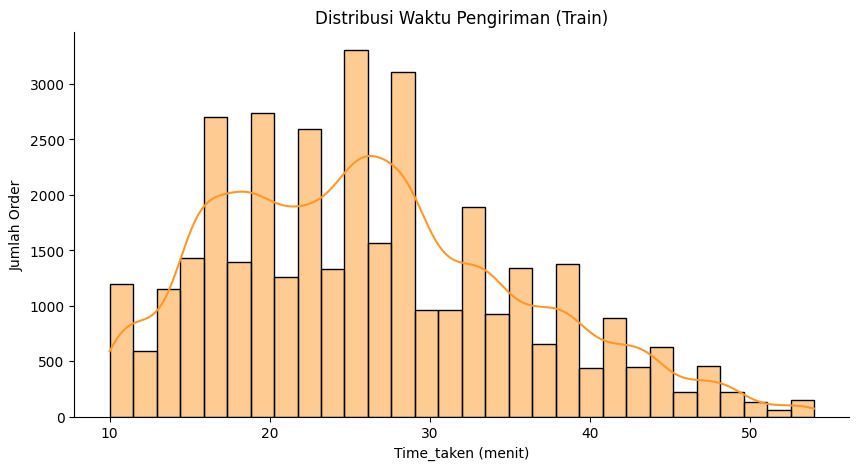

In [ ]:
# Buat palet gradasi kuning untuk konsistensi
colors = cm.YlOrBr(np.linspace(0.5, 1, 2))  # 2 warna: satu untuk hist, satu untuk box

# Histogram + KDE
plt.figure(figsize=(10,5))
sns.histplot(y_train, bins=30, kde=True, color=colors[0])
plt.title("Distribusi Waktu Pengiriman (Train)")
plt.xlabel("Time_taken (menit)")
plt.ylabel("Jumlah Order")

# Hilangkan grid dan border
plt.grid(False)
sns.despine(left=False, bottom=False)
plt.show()


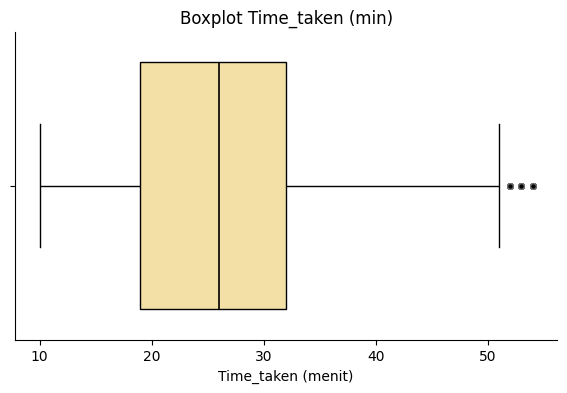

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.boxplot(
    x=y_train,  # data time taken
    color="#FFE699",  # kuning pastel
    boxprops=dict(edgecolor="black", linewidth=1),   # outline kotak tipis
    medianprops=dict(color="black", linewidth=1.2),  # median jelas
    whiskerprops=dict(color="black", linewidth=1),   # whiskers
    capprops=dict(color="black", linewidth=1),       # ujung whiskers
    flierprops=dict(markerfacecolor="black", marker="o", markersize=4, alpha=0.6) # outlier bulat kecil
)

plt.title("Boxplot Time_taken (min)")
plt.xlabel("Time_taken (menit)")
plt.grid(False)
sns.despine(left=False, bottom=False)
plt.show()


In [ ]:
y_train

,Time_taken (min)
43718,21
14600,34
11375,12
5438,30
20971,38
...,...
18551,12
38716,22
35232,12
26582,24


In [ ]:
num_cols = ['Delivery_person_Age',
            'Delivery_person_Ratings',
            'pickup_delay',
            ]

# Combine the selected numerical columns from x_train with y_train
combined_df = x_train[num_cols].copy()
combined_df['Time_taken (min)'] = y_train

display(combined_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,36142.0,29.563970,5.689458,15.0,25.0,30.0,34.0,50.0
Delivery_person_Ratings,36142.0,4.635535,0.320327,1.0,4.6,4.7,4.8,5.0
pickup_delay,36142.0,9.988933,4.014464,5.0,5.0,10.0,15.0,15.0
Time_taken (min),36142.0,26.300371,9.384903,10.0,19.0,26.0,32.0,54.0


## Numeric vs Numeric

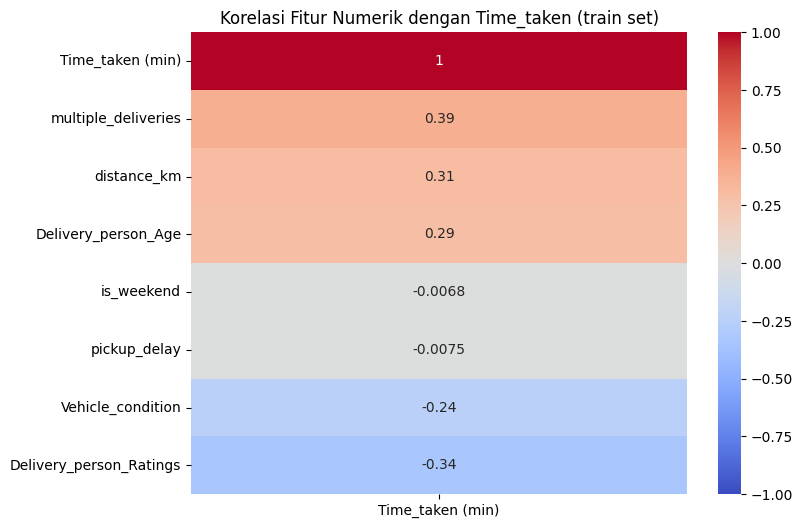

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

target_column = 'Time_taken (min)'

# gabungkan kembali target dengan x_train
train_df = x_train.copy()
train_df[target_column] = y_train

# pilih kolom numerik
num_cols = train_df.select_dtypes(include=['int64','float64']).columns

# hitung korelasi
corr = train_df[num_cols].corr()

# ambil hanya korelasi dengan target
corr_target = corr[[target_column]].sort_values(by=target_column, ascending=False)

# plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Fitur Numerik dengan Time_taken (train set)")
plt.show()


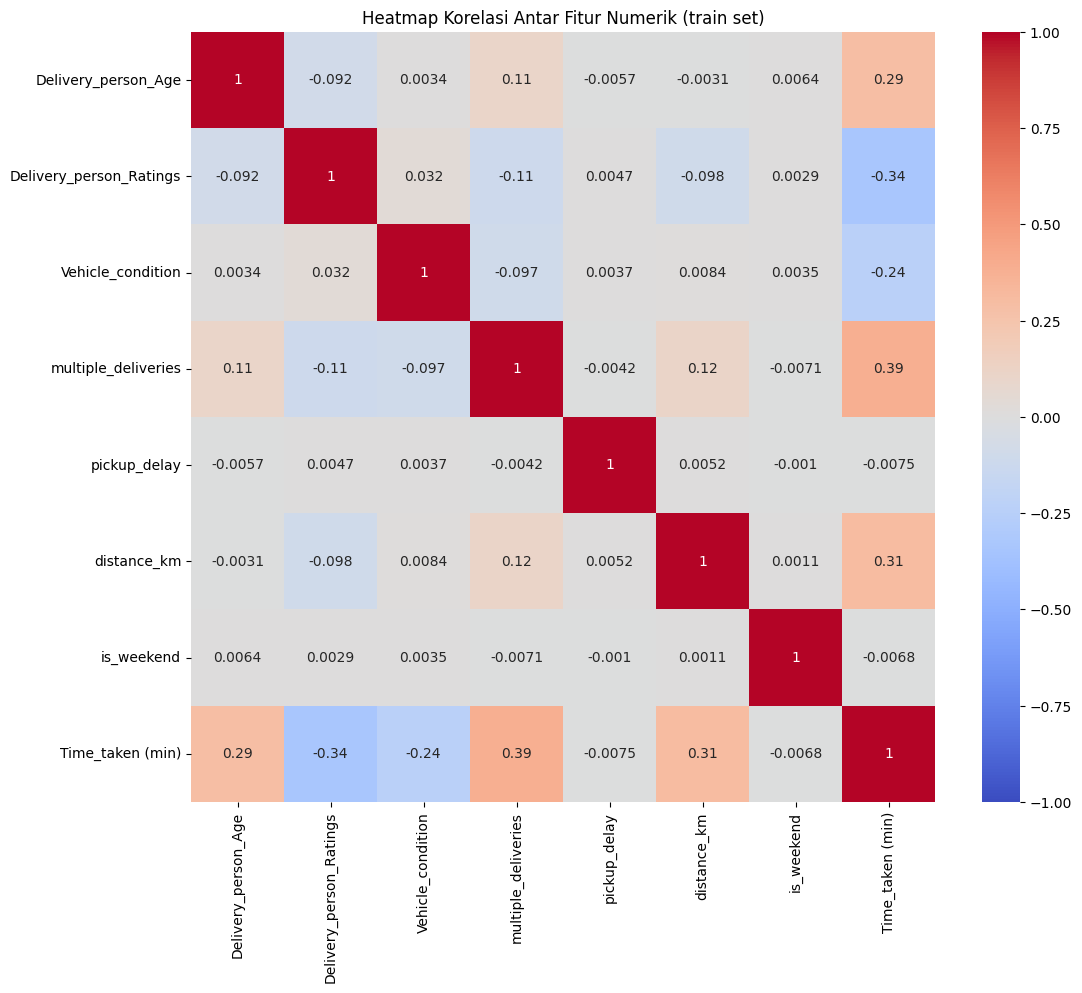

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# pakai data train
train_df = x_train.copy()
train_df[target_column] = y_train

# ambil kolom numerik
num_cols = train_df.select_dtypes(include=['int64','float64']).columns

# hitung matriks korelasi
corr_matrix = train_df[num_cols].corr()

# plot heatmap full
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Heatmap Korelasi Antar Fitur Numerik (train set)")
plt.show()


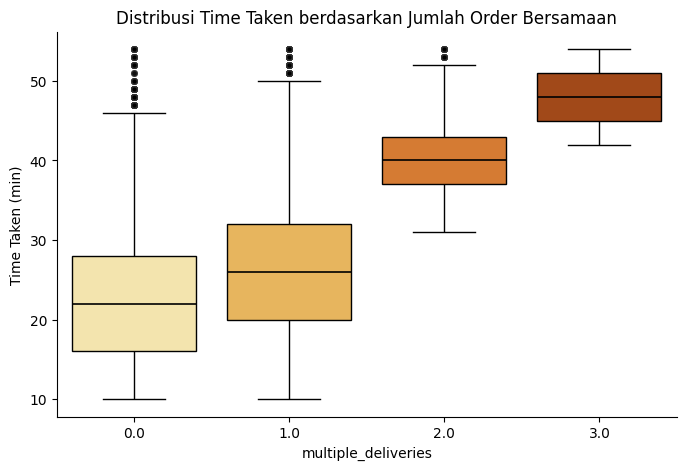

In [ ]:
# Buat palet gradasi kuning pastel sesuai jumlah kategori unik
n_cat = train_df['multiple_deliveries'].nunique()
palette = sns.color_palette("YlOrBr", n_cat)  # gradasi kuning → coklat

plt.figure(figsize=(8,5))
sns.boxplot(
    x='multiple_deliveries',
    y=target_column,
    data=train_df,
    palette=palette,
    boxprops=dict(edgecolor="black", linewidth=1),
    medianprops=dict(color="black", linewidth=1.2),
    whiskerprops=dict(color="black", linewidth=1),
    capprops=dict(color="black", linewidth=1),
    flierprops=dict(markerfacecolor="black", marker="o", markersize=4, alpha=0.6)
)

plt.title("Distribusi Time Taken berdasarkan Jumlah Order Bersamaan")
plt.xlabel("multiple_deliveries")
plt.ylabel("Time Taken (min)")
plt.grid(False)
sns.despine(left=False, bottom=False)
plt.show()


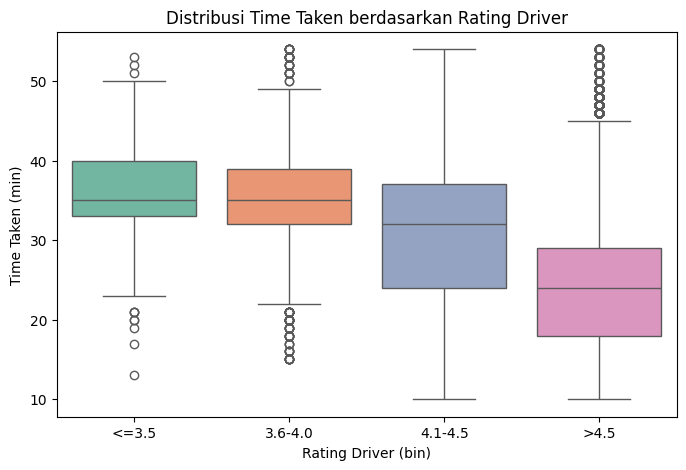

In [ ]:
# Membuat bin rating
train_df = x_train.copy()
train_df[target_column] = y_train
train_df['Rating_bin'] = pd.cut(train_df['Delivery_person_Ratings'], bins=[0,3.5,4,4.5,5], labels=["<=3.5","3.6-4.0","4.1-4.5",">4.5"])

plt.figure(figsize=(8,5))
sns.boxplot(x='Rating_bin', y=target_column, data=train_df, palette="Set2")
plt.title("Distribusi Time Taken berdasarkan Rating Driver")
plt.xlabel("Rating Driver (bin)")
plt.ylabel("Time Taken (min)")
plt.show()


## Numeric vs Category

Asterisk (*) = signifikan (p-value < 0.05)
Metode:
- Pearson r untuk numeric–numeric
- Point-Biserial untuk numeric–binary category
- Correlation Ratio η (ANOVA) untuk numeric–multi-class category



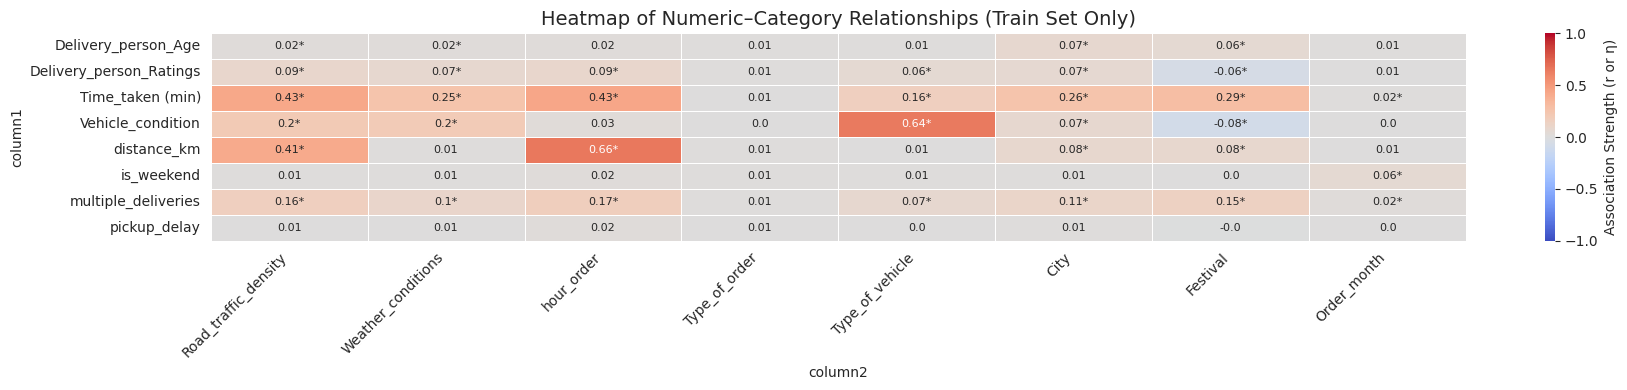

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, pointbiserialr, f_oneway

# ===== Helper Function =====
def relationship_numeric_category(x: pd.Series, y: pd.Series):
    """Hitung asosiasi antara numerik (x) dengan kategori/numerik (y)."""
    m = (~x.isna()) & (~y.isna())
    x = x[m]; y = y[m]

    if x.nunique() <= 1 or y.nunique() == 0:
        return np.nan, np.nan

    # Jika y numerik → Pearson correlation
    if pd.api.types.is_numeric_dtype(y):
        r, p = pearsonr(x, y)
        return p, r

    # Jika y kategori biner → Point-Biserial
    if y.nunique() == 2:
        y_codes = pd.Categorical(y).codes
        r, p = pointbiserialr(y_codes, x)
        return p, r

    # Jika y kategori multi-class → ANOVA + Correlation Ratio (η)
    y = pd.Categorical(y)
    groups = [x[y == lvl] for lvl in y.categories if (y == lvl).any()]
    if len(groups) < 2:
        return np.nan, np.nan
    try:
        f, p = f_oneway(*groups)
    except Exception:
        p = np.nan
    mu = x.mean()
    ss_between = sum([len(g) * (g.mean() - mu) ** 2 for g in groups])
    ss_total = ((x - mu) ** 2).sum()
    eta = np.sqrt(ss_between / ss_total) if ss_total > 0 else np.nan
    return p, eta


# ===== Definisi fitur =====
numeric_columns = numeric_features + [target_column]   # hanya benar2 numeric + target
category_columns = ordinal_features + nominal_features

# Pastikan kolom kategori di-cast ulang
x_train = x_train.copy()
x_train['Road_traffic_density'] = pd.Categorical(
    x_train['Road_traffic_density'], categories=traffic_order, ordered=True
)
x_train['Weather_conditions'] = pd.Categorical(
    x_train['Weather_conditions'], categories=weather_order, ordered=True
)

for col in nominal_features:
    x_train[col] = pd.Categorical(x_train[col])  # tanpa urutan

# ===== Hitung relasi =====
corrs = [[], [], [], []]

for num_col in numeric_columns:
    for cat_col in category_columns:
        x = y_train if num_col == target_column else x_train[num_col]
        y = x_train[cat_col]

        # Pastikan x numerik
        if not pd.api.types.is_numeric_dtype(x):
            continue

        pvalue, coef = relationship_numeric_category(x, y)
        corrs[0].append(num_col)
        corrs[1].append(cat_col)
        corrs[2].append(pvalue)
        corrs[3].append(coef)

df_temp = pd.DataFrame({
    'column1': corrs[0],
    'column2': corrs[1],
    'pvalue': corrs[2],
    'coef': corrs[3],
})

# ===== Annotasi ringkas =====
df_temp['annot'] = np.where(
    df_temp['pvalue'].isnull(), None,
    np.where(
        df_temp['pvalue'] > 0.05,
        df_temp['coef'].round(2),
        df_temp['coef'].round(2).astype(str) + '*'
    )
)

# ===== Pivot untuk heatmap =====
df_coef = df_temp.pivot_table(index='column1', columns='column2', values='coef', aggfunc='max')
df_coef = df_coef.reindex(columns=category_columns)

df_annot = df_temp.pivot_table(index='column1', columns='column2', values='annot', aggfunc='max')
df_annot = df_annot.reindex(columns=category_columns)

print("""Asterisk (*) = signifikan (p-value < 0.05)
Metode:
- Pearson r untuk numeric–numeric
- Point-Biserial untuk numeric–binary category
- Correlation Ratio η (ANOVA) untuk numeric–multi-class category
""")

# ===== Plot heatmap =====
plt.figure(figsize=(18, len(numeric_columns) * 0.5))
sns.set_style("whitegrid")

sns.heatmap(
    df_coef,
    vmin=-1, vmax=1, center=0,
    annot=df_annot,
    fmt='',
    annot_kws={"size": 8},
    cmap='coolwarm',
    linewidths=0.5,
    square=False,
    cbar_kws={'label': "Association Strength (r or η)"}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Heatmap of Numeric–Category Relationships (Train Set Only)", fontsize=14)
plt.tight_layout()
plt.show()


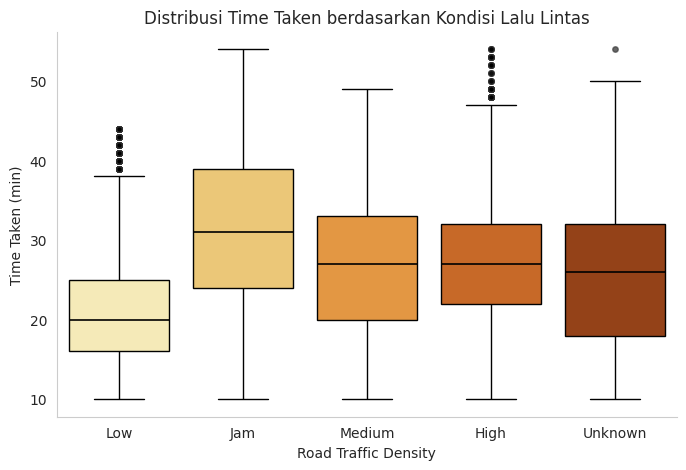

In [ ]:
# Buat palet gradasi kuning pastel sesuai jumlah kategori unik
n_cat = train_df['Road_traffic_density'].nunique()
palette = sns.color_palette("YlOrBr", n_cat)  # gradasi kuning → coklat

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Road_traffic_density',
    y=target_column,
    data=train_df,
    palette=palette,
    boxprops=dict(edgecolor="black", linewidth=1),
    medianprops=dict(color="black", linewidth=1.2),
    whiskerprops=dict(color="black", linewidth=1),
    capprops=dict(color="black", linewidth=1),
    flierprops=dict(markerfacecolor="black", marker="o", markersize=4, alpha=0.6)
)

plt.title("Distribusi Time Taken berdasarkan Kondisi Lalu Lintas")
plt.xlabel("Road Traffic Density")
plt.ylabel("Time Taken (min)")
plt.grid(False)
sns.despine(left=False, bottom=False)
plt.show()


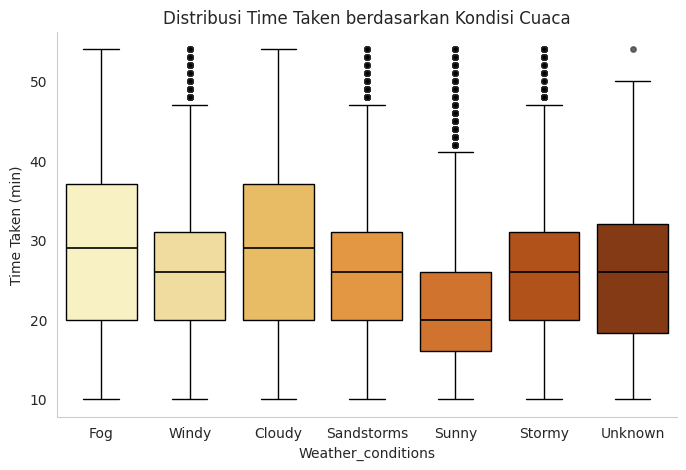

In [ ]:
# Buat palet gradasi kuning pastel sesuai jumlah kategori unik
n_cat = train_df['Weather_conditions'].nunique()
palette = sns.color_palette("YlOrBr", n_cat)  # gradasi kuning → coklat

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Weather_conditions',
    y=target_column,
    data=train_df,
    palette=palette,
    boxprops=dict(edgecolor="black", linewidth=1),
    medianprops=dict(color="black", linewidth=1.2),
    whiskerprops=dict(color="black", linewidth=1),
    capprops=dict(color="black", linewidth=1),
    flierprops=dict(markerfacecolor="black", marker="o", markersize=4, alpha=0.6)
)

plt.title("Distribusi Time Taken berdasarkan Kondisi Cuaca")
plt.xlabel("Weather_conditions")
plt.ylabel("Time Taken (min)")
plt.grid(False)
sns.despine(left=False, bottom=False)
plt.show()


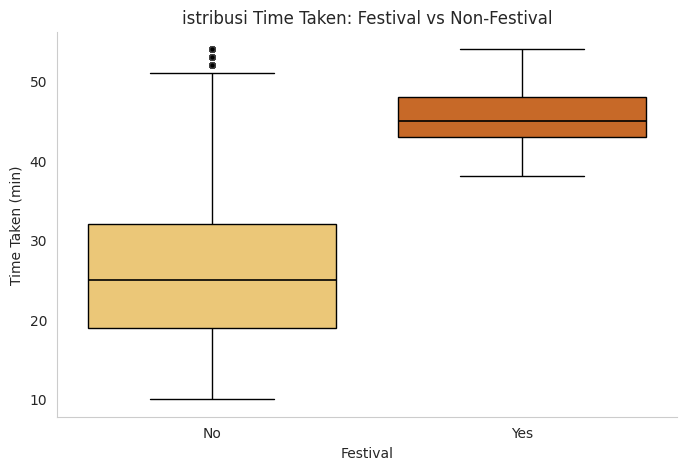

In [ ]:
# Buat palet gradasi kuning pastel sesuai jumlah kategori unik
n_cat = train_df['Festival'].nunique()
palette = sns.color_palette("YlOrBr", n_cat)  # gradasi kuning → coklat

plt.figure(figsize=(8,5))
sns.boxplot(
    x='Festival',
    y=target_column,
    data=train_df,
    palette=palette,
    boxprops=dict(edgecolor="black", linewidth=1),
    medianprops=dict(color="black", linewidth=1.2),
    whiskerprops=dict(color="black", linewidth=1),
    capprops=dict(color="black", linewidth=1),
    flierprops=dict(markerfacecolor="black", marker="o", markersize=4, alpha=0.6)
)

plt.title("istribusi Time Taken: Festival vs Non-Festival")
plt.xlabel("Festival")
plt.ylabel("Time Taken (min)")
plt.grid(False)
sns.despine(left=False, bottom=False)
plt.show()


In [ ]:
from scipy.stats import ttest_ind

festival_yes = train_df.loc[train_df['Festival']=='Yes', target_column]
festival_no  = train_df.loc[train_df['Festival']=='No', target_column]

t_stat, p_val = ttest_ind(festival_yes, festival_no, equal_var=False)
print(f"T-test: t={t_stat:.3f}, p={p_val:.3f}")


T-test: t=125.438, p=0.000


## Category vs Category

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(x: pd.Series, y: pd.Series):
    """Hitung Cramér’s V antara dua variabel kategorikal."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return p, v


In [ ]:
corrs_cat = [[], [], [], []]

for i, col1 in enumerate(category_columns):
    for j, col2 in enumerate(category_columns):
        if j <= i:  # supaya tidak duplikat & tidak cek dirinya sendiri
            continue
        p, v = cramers_v(x_train[col1], x_train[col2])
        corrs_cat[0].append(col1)
        corrs_cat[1].append(col2)
        corrs_cat[2].append(p)
        corrs_cat[3].append(v)

df_cat = pd.DataFrame({
    'column1': corrs_cat[0],
    'column2': corrs_cat[1],
    'pvalue': corrs_cat[2],
    'coef': corrs_cat[3],
})

# Annotasi (tambah * kalau signifikan)
df_cat['annot'] = np.where(
    df_cat['pvalue'].isnull(), None,
    np.where(
        df_cat['pvalue'] > 0.05,
        df_cat['coef'].round(2),
        df_cat['coef'].round(2).astype(str) + '*'
    )
)

# Pivot untuk heatmap
df_coef_cat = df_cat.pivot(index='column1', columns='column2', values='coef')
df_annot_cat = df_cat.pivot(index='column1', columns='column2', values='annot')


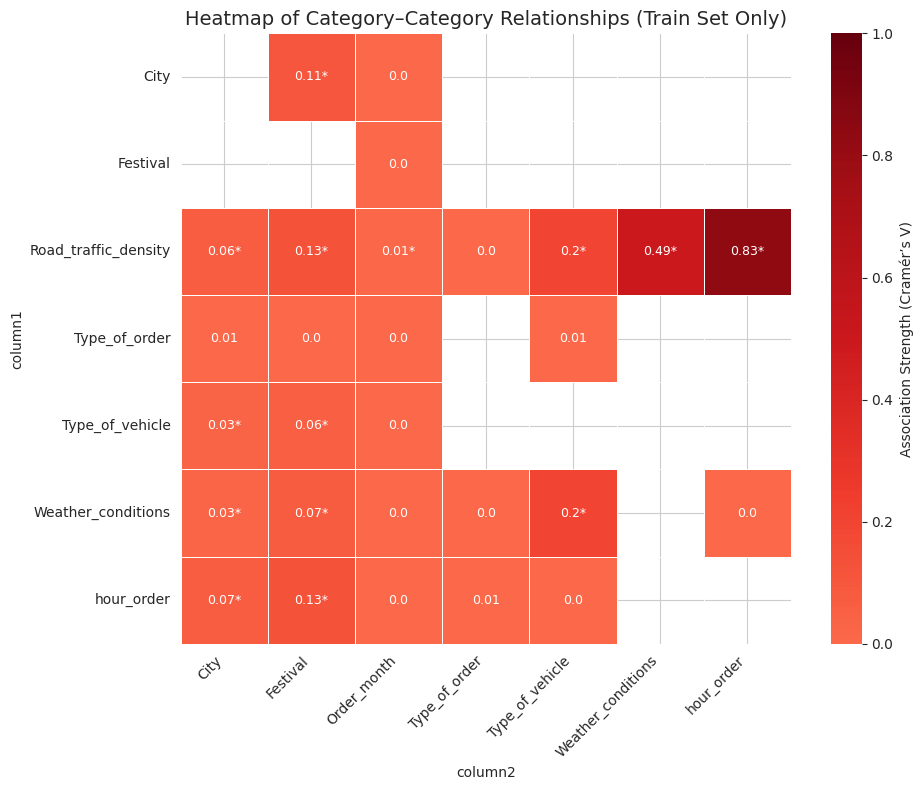

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_coef_cat,
    vmin=0, vmax=1, center=0,
    annot=df_annot_cat,
    fmt='',
    annot_kws={"size": 9},
    cmap='Reds',
    linewidths=0.5,
    square=True,
    cbar_kws={'label': "Association Strength (Cramér’s V)"}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Heatmap of Category–Category Relationships (Train Set Only)", fontsize=14)
plt.tight_layout()
plt.show()


# Tren Analysis

## Number Orders per Month

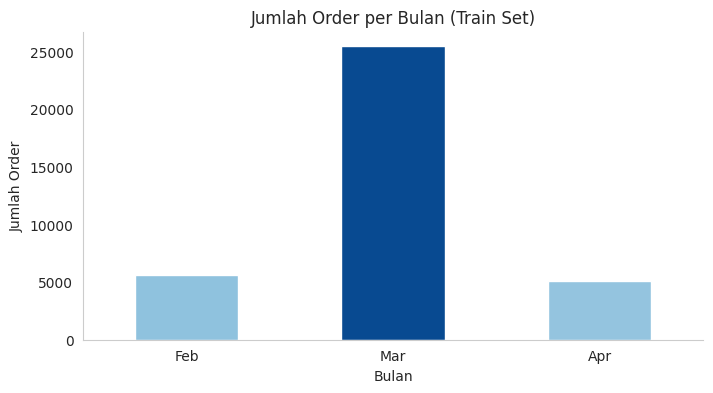

In [ ]:
import calendar
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, colors

# Gabungkan kembali train set
train_df = x_train.copy()
train_df[target_column] = y_train

order_per_month = train_df['Order_month'].value_counts().sort_index()

# Normalisasi nilai order
norm = colors.Normalize(vmin=order_per_month.min(), vmax=order_per_month.max())
cmap = cm.Blues

# Batasi gradasi agar tidak terlalu ekstrem (0.4–0.9)
bar_colors = [cmap(0.4 + 0.5 * norm(val)) for val in order_per_month]

plt.figure(figsize=(8,4))
order_per_month.plot(kind='bar', color=bar_colors)

plt.title("Jumlah Order per Bulan (Train Set)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Order")

plt.xticks(
    ticks=range(len(order_per_month)),
    labels=[calendar.month_abbr[m] for m in order_per_month.index],
    rotation=0
)

plt.grid(False)
sns.despine()
plt.show()


## Number Orders per Hour

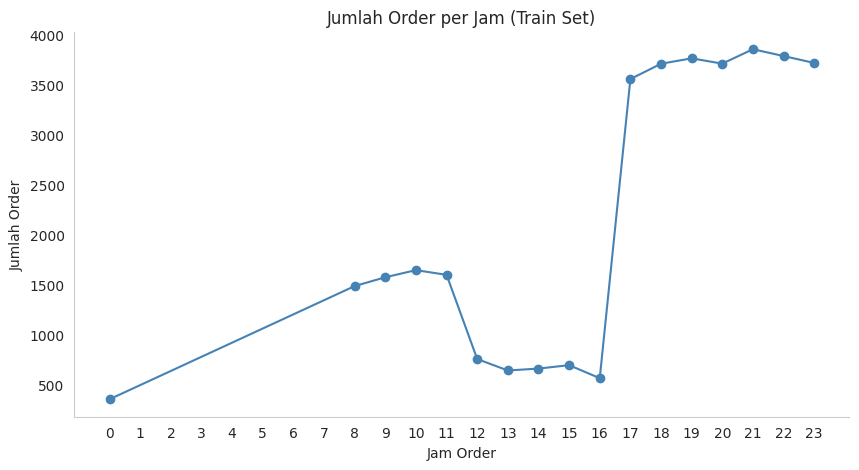

In [ ]:
# Gabungkan train set
train_df = x_train.copy()
train_df[target_column] = y_train

# Hitung jumlah order per jam
order_per_hour = train_df['hour_order'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(order_per_hour.index, order_per_hour.values, marker='o', linestyle='-', color='steelblue')

plt.title("Jumlah Order per Jam (Train Set)")
plt.xlabel("Jam Order")
plt.ylabel("Jumlah Order")
plt.xticks(range(0,24))   # tampilkan semua jam 0-23
plt.grid(False)

sns.despine()
plt.show()


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36142 entries, 43718 to 16161
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Delivery_person_Age      36142 non-null  float64 
 1   Delivery_person_Ratings  36142 non-null  float64 
 2   Weather_conditions       36142 non-null  category
 3   Road_traffic_density     36142 non-null  category
 4   Vehicle_condition        36142 non-null  int64   
 5   Type_of_order            36142 non-null  category
 6   Type_of_vehicle          36142 non-null  category
 7   multiple_deliveries      36142 non-null  float64 
 8   Festival                 36142 non-null  category
 9   City                     36142 non-null  category
 10  pickup_delay             36142 non-null  float64 
 11  distance_km              36142 non-null  float64 
 12  Order_month              36142 non-null  category
 13  is_weekend               36142 non-null  int64   
 14  hour_or

# Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# --- Tambahkan 2 fitur siklik dari jam ---
for df in (x_train, x_test):
    h = df['hour_order'].astype(float)
    df['hour_sin'] = np.sin(2*np.pi*h/24)
    df['hour_cos'] = np.cos(2*np.pi*h/24)

# --- Hapus hour_order dari daftar nominal ---
nominal_wo_hour = ['Type_of_order', 'Type_of_vehicle', 'City', 'Festival', 'Order_month']

# --- Pastikan numeric_features sudah termasuk 'is_weekend' ---
numeric_plus = numeric_features + ['hour_sin', 'hour_cos']

# --- Buat ColumnTransformer ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_plus),
        ('ord', OrdinalEncoder(categories=[traffic_order, weather_order]),
                ['Road_traffic_density','Weather_conditions']),
        ('nom', OneHotEncoder(handle_unknown='ignore', drop='first'), nominal_wo_hour),
    ],
    remainder='drop'  # semua selain yg disebut dibuang
)

# --- Transform data ---
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep  = preprocessor.transform(x_test)

# --- Ambil nama kolom hasil transformasi ---
ohe = preprocessor.named_transformers_['nom']
ohe_features = ohe.get_feature_names_out(nominal_wo_hour)

all_features = np.concatenate([
    numeric_plus,                                    # numeric (sudah termasuk is_weekend, hour_sin, hour_cos)
    ['Road_traffic_density','Weather_conditions'],   # ordinal
    ohe_features                                    # one-hot
])

# --- Buat DataFrame hasil preprocessing ---
x_train_prep_df = pd.DataFrame(x_train_prep, columns=all_features, index=x_train.index)
x_test_prep_df  = pd.DataFrame(x_test_prep,  columns=all_features, index=x_test.index)

# --- Cek hasil ---
print("Shape train:", x_train_prep_df.shape)
print("Shape test :", x_test_prep_df.shape)
print("Contoh kolom:", x_train_prep_df.columns[:15])


Shape train: (36142, 23)
Shape test : (9028, 23)
Contoh kolom: Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries',
       'Vehicle_condition', 'pickup_delay', 'is_weekend', 'distance_km',
       'hour_sin', 'hour_cos', 'Road_traffic_density', 'Weather_conditions',
       'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack',
       'Type_of_vehicle_electric_scooter'],
      dtype='object')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Ambil X train yang sudah dipreprocessing
X = x_train_prep_df.copy()

# Tambahkan konstanta (intercept) untuk regresi
X_const = add_constant(X)

# Hitung VIF
vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Urutkan dari yang paling bermasalah
print(vif.sort_values("VIF", ascending=False))


                             feature         VIF
0                              const  926.476534
16        Type_of_vehicle_motorcycle  221.074194
17           Type_of_vehicle_scooter  200.392598
15  Type_of_vehicle_electric_scooter   68.793282
8                           hour_sin    1.954977
7                        distance_km    1.732624
4                  Vehicle_condition    1.730694
23                     Order_month_4    1.652025
22                     Order_month_3    1.646820
14               Type_of_order_Snack    1.515400
13                Type_of_order_Meal    1.511579
12              Type_of_order_Drinks    1.507016
9                           hour_cos    1.442254
10              Road_traffic_density    1.414240
3                multiple_deliveries    1.084719
21                      Festival_Yes    1.052901
2            Delivery_person_Ratings    1.042343
20                        City_Urban    1.029210
1                Delivery_person_Age    1.025436
18                  

# Modeling

## Linear Regression

In [ ]:
# Training
model = LinearRegression()
model.fit(x_train_prep, y_train)

# Prediksi
y_pred = model.predict(x_test_prep)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 5.028443534749526
RMSE: 6.350585373912991
R²  : 0.5420654363209804


## Regularized Regression

In [ ]:
# Fungsi evaluasi
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name:15s} → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")
    return name, mae, rmse, r2

# Model dasar
models = [
    ("Linear", LinearRegression()),
    ("Ridge", Ridge(alpha=1.0)),          # alpha default
    ("Lasso", Lasso(alpha=0.001)),        # alpha kecil agar tidak semua koefisien = 0
    ("ElasticNet", ElasticNet(alpha=0.001, l1_ratio=0.5))
]

results = []
for name, model in models:
    results.append(evaluate_model(name, model, x_train_prep, y_train, x_test_prep, y_test))

Linear          → MAE: 5.03, RMSE: 6.35, R²: 0.542
Ridge           → MAE: 5.03, RMSE: 6.35, R²: 0.542


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.643e+02, tolerance: 3.183e+02
  model = cd_fast.enet_coordinate_descent(


Lasso           → MAE: 5.03, RMSE: 6.35, R²: 0.542
ElasticNet      → MAE: 5.03, RMSE: 6.35, R²: 0.543


In [ ]:
# GridSearch untuk mencari alpha optimal
param_grid = {'alpha': np.logspace(-3, 2, 20)}  # 1e-4 sampai 1e2
grid_ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(x_train_prep, y_train)

grid_lasso = GridSearchCV(Lasso(alpha=0.001, max_iter=10000), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(x_train_prep, y_train)

grid_enet = GridSearchCV(ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000),
                         {'alpha': np.logspace(-3, 2, 10), 'l1_ratio': [0.1, 0.5, 0.9]},
                         cv=5, scoring='r2', n_jobs=-1)
grid_enet.fit(x_train_prep, y_train)

print("\n=== Best Hyperparameters ===")
print("Ridge best alpha :", grid_ridge.best_params_, "→ R²:", grid_ridge.best_score_)
print("Lasso best alpha :", grid_lasso.best_params_, "→ R²:", grid_lasso.best_score_)
print("ElasticNet best  :", grid_enet.best_params_, "→ R²:", grid_enet.best_score_)


=== Best Hyperparameters ===
Ridge best alpha : {'alpha': np.float64(1.438449888287663)} → R²: 0.5364521054246107
Lasso best alpha : {'alpha': np.float64(0.001)} → R²: 0.5363577552962608
ElasticNet best  : {'alpha': np.float64(0.001), 'l1_ratio': 0.9} → R²: 0.5363370897210544


In [ ]:
# Evaluasi best estimator
models = {
    "Linear"     : LinearRegression(),
    "Ridge"      : grid_ridge.best_estimator_,
    "Lasso"      : grid_lasso.best_estimator_,
    "ElasticNet" : grid_enet.best_estimator_
}

results = []
for name, model in models.items():
    model.fit(x_train_prep, y_train)
    y_pred = model.predict(x_test_prep)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2"]).set_index("Model")

print("\n=== Ringkasan Hasil (Best Model) ===")
print(results_df)



=== Ringkasan Hasil (Best Model) ===
                 MAE      RMSE        R2
Model                                   
Linear      5.028444  6.350585  0.542065
Ridge       5.028259  6.349965  0.542155
Lasso       5.027762  6.348172  0.542413
ElasticNet  5.027671  6.347872  0.542457


## Random Forest

In [ ]:
# Model Random Forest baseline
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(x_train_prep, y_train)

y_pred_rf = rf.predict(x_test_prep)

print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²  :", r2_score(y_test, y_pred_rf))


MAE : 3.2116762295081966
RMSE: 4.072670793245699
R²  : 0.8116634898501232


In [ ]:
# Baseline Model
rf_default = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)
rf_default.fit(x_train_prep, y_train)
y_pred_default = rf_default.predict(x_test_prep)

print("=== Baseline (Default RF) ===")
print("MAE  :", mean_absolute_error(y_test, y_pred_default))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_default)))
print("R²   :", r2_score(y_test, y_pred_default))

# 2. GridSearchCV (fokus kecil, hemat waktu)
param_grid = {
    "n_estimators": [200],          # fix di sekitar default
    "max_depth": [None, 20, 30],    # default + variasi
    "min_samples_split": [2, 4],    # default + variasi
    "min_samples_leaf": [1, 2]      # default + variasi
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=2,                           # lebih cepat
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train_prep, y_train)

print("\n=== GridSearchCV Result ===")
print("Best Params:", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)

best_rf_grid = grid_search.best_estimator_
y_pred_grid = best_rf_grid.predict(x_test_prep)

print("\nEvaluasi Test Set (GridSearch):")
print("MAE  :", mean_absolute_error(y_test, y_pred_grid))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_grid)))
print("R²   :", r2_score(y_test, y_pred_grid))

# 3. RandomizedSearchCV (lebih luas tapi cepat)
param_dist = {
    "n_estimators": [150, 200, 250],
    "max_depth": [None, 15, 25, 35],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt", "log2"]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,                      # hanya 10 kombinasi → cepat
    cv=2,                           # hemat waktu
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(x_train_prep, y_train)

print("\n=== RandomizedSearchCV Result ===")
print("Best Params:", random_search.best_params_)
print("Best CV MAE:", -random_search.best_score_)

best_rf_rand = random_search.best_estimator_
y_pred_rand = best_rf_rand.predict(x_test_prep)

print("\nEvaluasi Test Set (RandomizedSearch):")
print("MAE  :", mean_absolute_error(y_test, y_pred_rand))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_rand)))
print("R²   :", r2_score(y_test, y_pred_rand))


=== Baseline (Default RF) ===
MAE  : 3.2172724856003545
RMSE : 4.081020669347077
R²   : 0.8108904351741284
Fitting 2 folds for each of 12 candidates, totalling 24 fits

=== GridSearchCV Result ===
Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
Best CV MAE: 3.221714301726218

Evaluasi Test Set (GridSearch):
MAE  : 3.19542118200683
RMSE : 4.0472222728484715
R²   : 0.8140098180131172
Fitting 2 folds for each of 10 candidates, totalling 20 fits

=== RandomizedSearchCV Result ===
Best Params: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25}
Best CV MAE: 3.3587012764775634

Evaluasi Test Set (RandomizedSearch):
MAE  : 3.300387490083088
RMSE : 4.169964610940601
R²   : 0.8025574983289655


## XG Boost

In [ ]:
# Model XGBoost baseline
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(x_train_prep, y_train)

# Evaluasi di test set
y_pred_xgb = xgb.predict(x_test_prep)

print("\nEvaluasi Test Set (XGBoost):")
print("MAE  :", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R²   :", r2_score(y_test, y_pred_xgb))



Evaluasi Test Set (XGBoost):
MAE  : 3.219292640686035
RMSE : 4.035432759917386
R²   : 0.8150918483734131


In [ ]:
# RandomizedSearchCV (Eksplor awal)
xgb = XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 6, 8],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=15,                # sampling 15 kombinasi
    cv=3,                     # cukup stabil
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(x_train_prep, y_train)

print("Best Params (RandomizedSearch):", random_search.best_params_)
print("Best CV MAE:", -random_search.best_score_)

best_xgb_random = random_search.best_estimator_
y_pred_rand = best_xgb_random.predict(x_test_prep)

print("\nEvaluasi Test Set (XGB RandomizedSearch):")
print("MAE  :", mean_absolute_error(y_test, y_pred_rand))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_rand)))
print("R²   :", r2_score(y_test, y_pred_rand))

# GridSearchCV (Refine di sekitar best params)
best_params = random_search.best_params_

param_grid = {
    "n_estimators": [best_params["n_estimators"]-100, best_params["n_estimators"], best_params["n_estimators"]+100],
    "learning_rate": [best_params["learning_rate"], best_params["learning_rate"]*0.5, best_params["learning_rate"]*1.5],
    "max_depth": [max(2, best_params["max_depth"]-1), best_params["max_depth"], best_params["max_depth"]+1],
    "subsample": [best_params["subsample"]],
    "colsample_bytree": [best_params["colsample_bytree"]]
}

grid_search = GridSearchCV(
    estimator=XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train_prep, y_train)

print("\nBest Params (GridSearch refine):", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)

best_xgb_grid = grid_search.best_estimator_
y_pred_grid = best_xgb_grid.predict(x_test_prep)

print("\nEvaluasi Test Set (XGB GridSearch refine):")
print("MAE  :", mean_absolute_error(y_test, y_pred_grid))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_grid)))
print("R²   :", r2_score(y_test, y_pred_grid))


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Params (RandomizedSearch): {'subsample': 0.6, 'n_estimators': 600, 'max_depth': 8, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best CV MAE: 3.151923100153605

Evaluasi Test Set (XGB RandomizedSearch):
MAE  : 3.1495602130889893
RMSE : 3.9489347542545414
R²   : 0.8229337334632874
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Best Params (GridSearch refine): {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 600, 'subsample': 0.6}
Best CV MAE: 3.1491123835245767

Evaluasi Test Set (XGB GridSearch refine):
MAE  : 3.1431400775909424
RMSE : 3.945124072116994
R²   : 0.8232753276824951


# Model Interpretation

## Explain model with SHAP

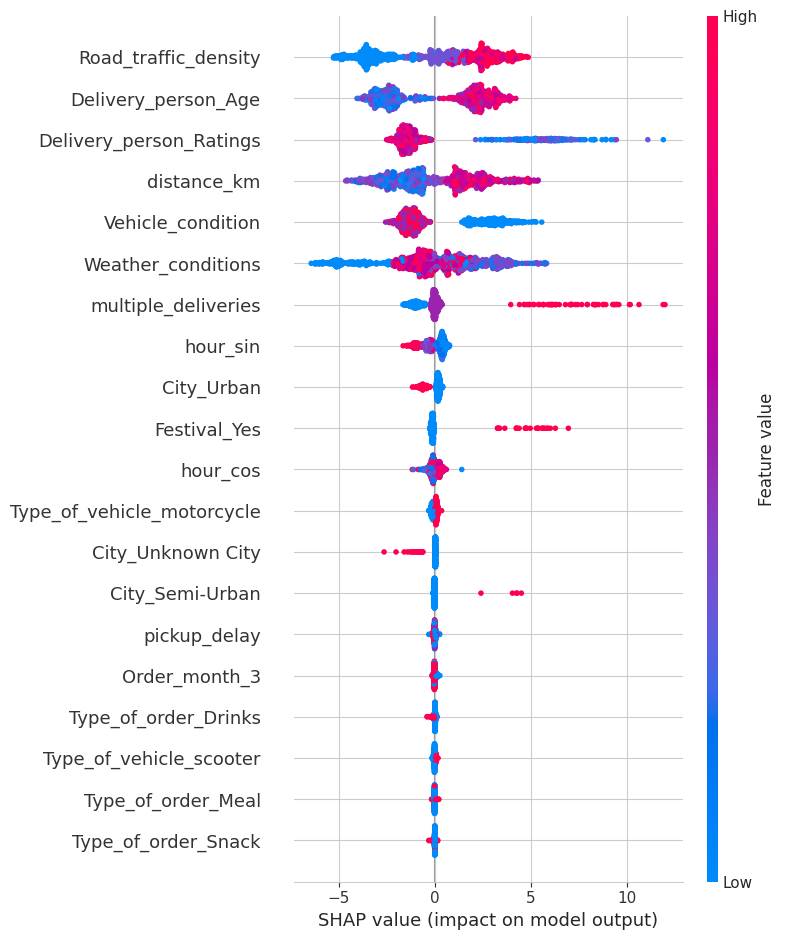

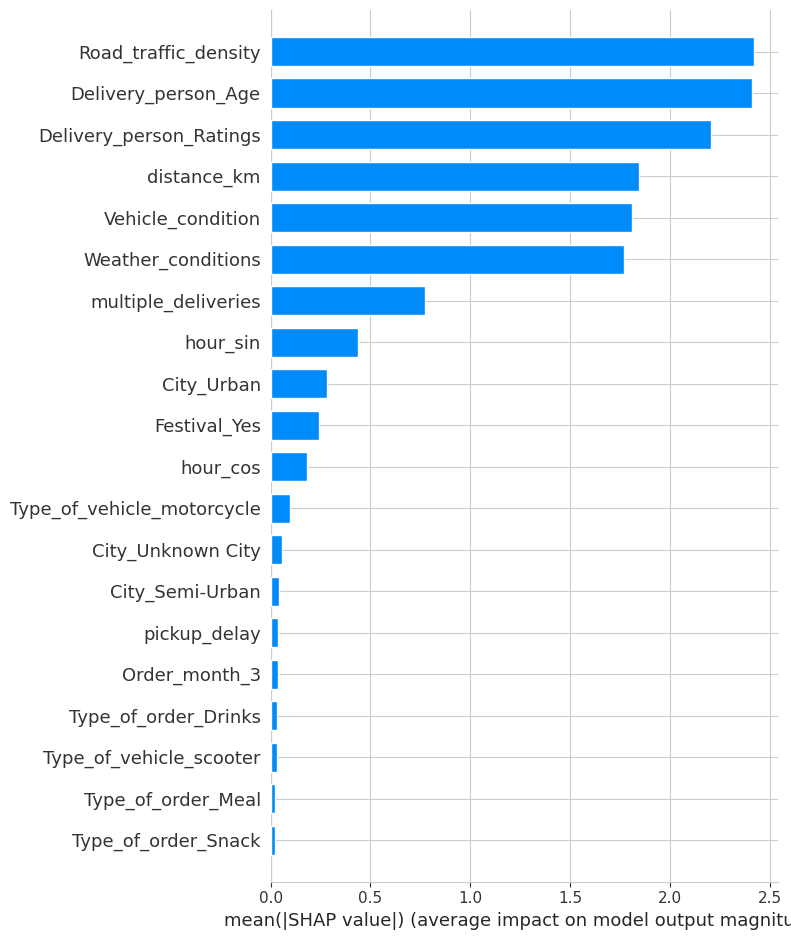

In [ ]:
# Ambil sample data dari DataFrame dengan nama kolom
X_sample = x_train_prep_df.sample(1000, random_state=42)

# Explainer SHAP untuk model terbaik
explainer = shap.TreeExplainer(best_xgb_grid)

# Hitung SHAP values
shap_values = explainer.shap_values(X_sample)

# Plot summary (dot plot)
shap.summary_plot(shap_values, X_sample, plot_type="dot", show=True)

# Plot summary (bar plot)
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=True)


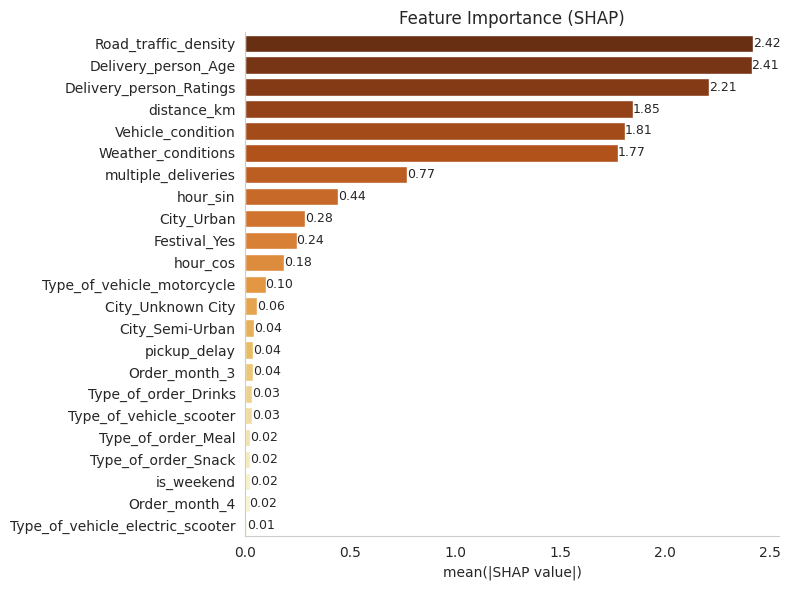

In [ ]:
# Hitung importance rata-rata SHAP
importance = np.abs(shap_values).mean(axis=0)
feat_importance = pd.DataFrame({
    "feature": X_sample.columns,
    "importance": importance
}).sort_values("importance", ascending=False)

# Plot manual pakai seaborn
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x="importance",
    y="feature",
    data=feat_importance,
    palette=sns.color_palette("YlOrBr", feat_importance.shape[0])[::-1]  # gelap → terang
)

# Judul dan label
plt.title("Feature Importance (SHAP)")
plt.xlabel("mean(|SHAP value|)")
plt.ylabel("")

# Hilangkan grid
plt.grid(False)

# Hilangkan border atas & kanan
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tambahkan label angka di ujung bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{width:.2f}",
                (width, p.get_y() + p.get_height()/2),
                ha='left', va='center', fontsize=9)

plt.tight_layout()
plt.show()


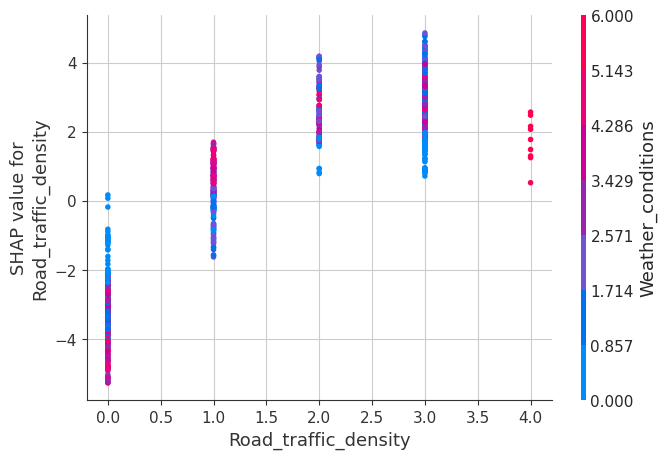

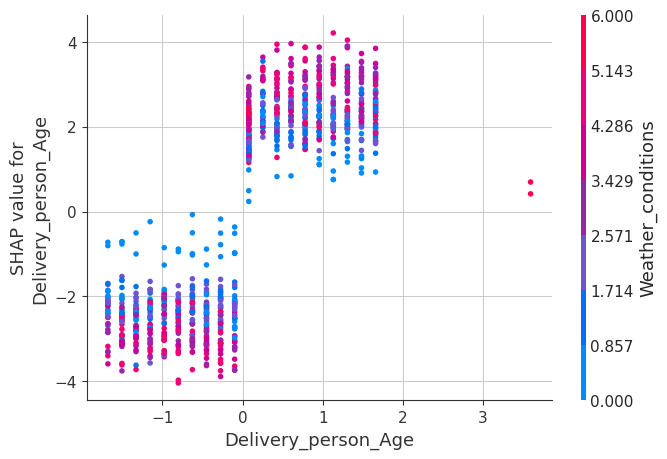

In [ ]:
shap.dependence_plot("Road_traffic_density", shap_values, X_sample)
shap.dependence_plot("Delivery_person_Age", shap_values, X_sample)


## Delivery Person Age

In [ ]:
# Untuk ordinal
print("Traffic categories:", traffic_order)
print("Weather categories:", weather_order)

# Untuk nominal encoder
ohe = preprocessor.named_transformers_['nom']
for col, cats in zip(nominal_features, ohe.categories_):
    print(f"{col} categories: {cats}")


Traffic categories: ['Low', 'Medium', 'High', 'Jam', 'Unknown']
Weather categories: ['Sunny', 'Cloudy', 'Fog', 'Stormy', 'Windy', 'Sandstorms', 'Unknown']
Type_of_order categories: ['Buffet' 'Drinks' 'Meal' 'Snack']
Type_of_vehicle categories: ['bicycle' 'electric_scooter' 'motorcycle' 'scooter']
City categories: ['Metropolitian' 'Semi-Urban' 'Unknown City' 'Urban']
Festival categories: ['No' 'Yes']
Order_month categories: [2 3 4]


In [ ]:
import pandas as pd
import numpy as np

def make_scenario(
    traffic="High",
    weather="Sunny",
    order_type="Meal",
    vehicle="motorcycle",
    city="Metropolitian",
    festival="No",
    order_month=3,
    order_weekday=2,
    order_hour=18,
    is_weekend=0,
    age=25,
    rating=4.5,
    vehicle_condition=5,
    multiple_deliveries=0,
    pickup_delay=5,
    rest_lat=28.6,
    rest_long=77.1,
    dest_lat=28.5,
    dest_long=77.2
):
    """
    Membuat 1 baris DataFrame dengan semua kolom lengkap sesuai preprocessor.
    Nilai default sudah valid, bisa diubah lewat parameter.
    """

    data = {
        "Road_traffic_density": [traffic],          # ['Low','Medium','High','Jam','Unknown']
        "Weather_conditions": [weather],            # ['Sunny','Cloudy','Fog','Stormy','Windy','Sandstorms','Unknown']
        "Type_of_order": [order_type],              # ['Buffet','Drinks','Meal','Snack']
        "Type_of_vehicle": [vehicle],               # ['bicycle','electric_scooter','motorcycle','scooter']
        "City": [city],                             # ['Metropolitian','Semi-Urban','Unknown City','Urban']
        "Festival": [festival],                     # ['No','Yes']
        "Order_month": [order_month],               # [2,3,4]
        "Order_weekday": [order_weekday],           # [0-6]
        "hour_order": [order_hour],                 # [0,8,...,23]
        "is_weekend": [is_weekend],                 # 0 atau 1
        "Delivery_person_Age": [age],
        "Delivery_person_Ratings": [rating],
        "Vehicle_condition": [vehicle_condition],
        "multiple_deliveries": [multiple_deliveries],
        "pickup_delay": [pickup_delay],
        "Restaurant_latitude": [rest_lat],
        "Restaurant_longitude": [rest_long],
        "Delivery_location_latitude": [dest_lat],
        "Delivery_location_longitude": [dest_long]
    }

    df_scenario = pd.DataFrame(data)

    # Calculate distance_km using the haversine function defined earlier
    df_scenario["distance_km"] = haversine(
        df_scenario["Restaurant_latitude"], df_scenario["Restaurant_longitude"],
        df_scenario["Delivery_location_latitude"], df_scenario["Delivery_location_longitude"]
    )


    return df_scenario

In [ ]:
# Buat dua skenario berbeda
young_fast = make_scenario(age=22, rating=4.8, vehicle_condition=5, is_weekend=0)
old_slow  = make_scenario(age=45, rating=3.5, vehicle_condition=2, is_weekend=1)

# Gabung
df_scenarios = pd.concat([
    young_fast.assign(Profile="Kurir muda, rating tinggi"),
    old_slow.assign(Profile="Kurir tua, rating rendah")
])

# Preprocessing
X_scenarios = preprocessor.transform(df_scenarios)

# Prediksi
y_pred = best_xgb_grid.predict(X_scenarios)

# Hasil
df_scenarios["ETA_predicted"] = y_pred
print(df_scenarios[["Profile", "ETA_predicted"]])


ValueError: columns are missing: {'hour_cos', 'hour_sin'}